In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [2]:
df_metadata = pd.read_csv(r'C:\Users\user\AppData\Local\Programs\Python\Python39\Scripts\iSDA_soil_metadata.csv')
df= pd.read_csv(r'C:\Users\user\AppData\Local\Programs\Python\Python39\Scripts\iSDA_soil_data.csv')

In [3]:
df.head()
df = df.fillna(df.mean())
df = df.reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_9388\2353129382.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [4]:
df.columns

Index(['index', 'longitude', 'latitude', 'start_date', 'end_date', 'source',
       'horizon_lower', 'horizon_upper', 'aluminium_extractable',
       'boron_extractable', 'calcium_extractable', 'carbon_organic',
       'carbon_total', 'copper_extractable', 'electrical_conductivity',
       'iron_extractable', 'magnesium_extractable', 'manganese_extractable',
       'nitrogen_total', 'ph', 'phosphorus_extractable',
       'potassium_extractable', 'sodium_extractable', 'sulphur_extractable',
       'zinc_extractable'],
      dtype='object')

In [5]:
df['iron_extractable']

0         92.3660
1        115.9230
2         78.7090
3        127.5270
4         77.5420
           ...   
49220    136.3560
49221     93.7379
49222     76.2171
49223     78.6000
49224     59.5000
Name: iron_extractable, Length: 49225, dtype: float64

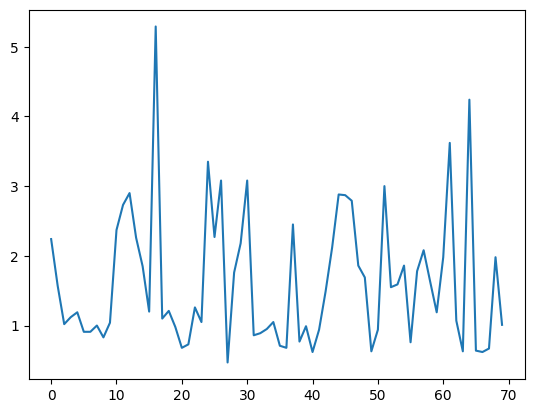

In [6]:
plt.plot(df['nitrogen_total'][:70])

In [7]:
x = np.asarray(df[['longitude','latitude']])*10000
y = np.asarray(df['nitrogen_total'])
        
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=14)
type(y_train[3])

numpy.float64

In [8]:
y[49224]

0.246

In [9]:
# clf = SVR(C=1)

In [10]:
# clf.fit(x_train, y_train)

In [11]:
# y_pred = clf.predict(x_test)

In [12]:
# error_margin = []
# for i in range(len(y_pred)):
#     error_margin.append(y_test[i]-y_pred[i])
# # error_margin

In [13]:
# for i in range(len(error_margin)):
#     if error_margin[i] < 0:
#         error_margin[i] = error_margin[i]*-1

# average_error = None
# average_error = sum(error_margin)/len(error_margin)

# print(f"The average error is {average_error}")

In [14]:
# error_margin[:10]

In [15]:
y_test[:10]

array([0.77 , 0.45 , 1.86 , 0.88 , 3.005, 0.86 , 0.62 , 0.5  , 0.55 ,
       1.02 ])

## Random Forest Regressor

In [ ]:
rng = RandomForestRegressor(max_depth=500, random_state=1)
rng.fit(x_train, y_train)

In [ ]:
y_pred = rng.predict(x_test)

In [ ]:
error_margin = []
for i in range(len(y_pred)):
    error_margin.append(y_test[i]-y_pred[i])
# error_margin

In [ ]:
for i in range(len(error_margin)):
    if error_margin[i] < 0:
        error_margin[i] = error_margin[i]*-1

average_error = None
average_error = sum(error_margin)/len(error_margin)

print(f"The average error is {average_error}")

In [78]:
max(y_test)/0.29

33.96551724137931

In [79]:
for i in range(len(y_pred)):
    print(f"Expected: {y_test[i]}       Predicted: {y_pred[i]}           Error: {y_pred[i] - y_test[i]}")

Expected: 0.77       Predicted: 0.9868916666666664           Error: 0.21689166666666637
Expected: 0.45       Predicted: 0.6486999999999995           Error: 0.1986999999999995
Expected: 1.86       Predicted: 1.1606633333333316           Error: -0.6993366666666685
Expected: 0.88       Predicted: 0.659099999999999           Error: -0.22090000000000098
Expected: 3.005       Predicted: 1.7880500000000024           Error: -1.2169499999999975
Expected: 0.86       Predicted: 0.34138500000000055           Error: -0.5186149999999994
Expected: 0.62       Predicted: 0.8314166666666664           Error: 0.21141666666666636
Expected: 0.5       Predicted: 0.946042619047619           Error: 0.446042619047619
Expected: 0.55       Predicted: 0.6266999999999995           Error: 0.07669999999999944
Expected: 1.02       Predicted: 0.5104833333333328           Error: -0.5095166666666672
Expected: 0.86       Predicted: 1.2629000000000008           Error: 0.4029000000000008
Expected: 0.54       Predicted: 0.90

In [23]:
y_pred[2350:2400]

array([], dtype=float64)

## Mulitperceptron Neural Network Layer

In [24]:
mlp = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 20, 20), random_state=1, max_iter=3000)

In [ ]:
mlp.fit(x_train, y_train)

In [ ]:
y_pred = mlp.predict(x_test)

In [ ]:
error_margin = []
for i in range(len(y_pred)):
    error_margin.append(y_test[i]-y_pred[i])
# error_margin

In [ ]:
for i in range(len(error_margin)):
    if error_margin[i] < 0:
        error_margin[i] = error_margin[i]*-1

average_error = None
average_error = sum(error_margin)/len(error_margin)

print(f"The average error is {average_error}")

In [35]:
x_ax = []

for i in range(len(y_test)):
    x_ax.append(i)

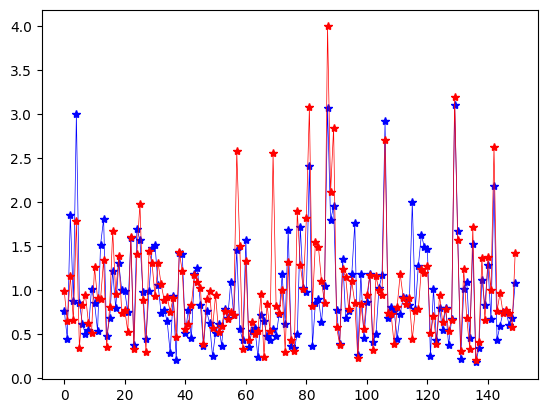

In [85]:
plt.plot(y_test[:150], color='b', linewidth=0.5, marker='*')
plt.plot(y_pred[:150], color='r', linewidth=0.5, marker='*')

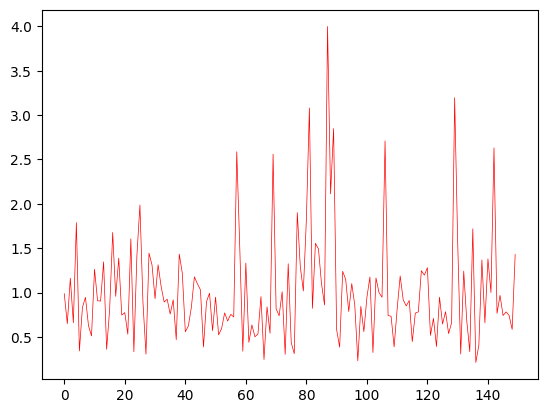

In [86]:
plt.plot(y_pred[:150], color='r', linewidth=0.5)